# 🏦 Predicting Loan Payback (Tabular Playground Nov 2025)

**Goal:** Predict the probability that a borrower will pay back their loan.


### 📘 Import libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

###📊  Load Data

In [ ]:
train_df = pd.read_csv('train.csv')
final_test_df = pd.read_csv('test.csv')

In [ ]:
train_df.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


### 🔍  Data Quality check

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    593994 non-null  int64  
 1   annual_income         593994 non-null  float64
 2   debt_to_income_ratio  593994 non-null  float64
 3   credit_score          593994 non-null  int64  
 4   loan_amount           593994 non-null  float64
 5   interest_rate         593994 non-null  float64
 6   gender                593994 non-null  object 
 7   marital_status        593994 non-null  object 
 8   education_level       593994 non-null  object 
 9   employment_status     593994 non-null  object 
 10  loan_purpose          593994 non-null  object 
 11  grade_subgrade        593994 non-null  object 
 12  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 58.9+ MB


In [ ]:
train_df = train_df.drop_duplicates()

In [ ]:
train_df = train_df.drop(columns='id')

In [ ]:
test_id = final_test_df['id']
final_test_df.drop(columns='id')

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade
0,28781.05,0.049,626,11461.42,14.73,Female,Single,High School,Employed,Other,D5
1,46626.39,0.093,732,15492.25,12.85,Female,Married,Master's,Employed,Other,C1
2,54954.89,0.367,611,3796.41,13.29,Male,Single,Bachelor's,Employed,Debt consolidation,D1
3,25644.63,0.110,671,6574.30,9.57,Female,Single,Bachelor's,Employed,Debt consolidation,C3
4,25169.64,0.081,688,17696.89,12.80,Female,Married,PhD,Employed,Business,C1
...,...,...,...,...,...,...,...,...,...,...,...
254564,92835.97,0.068,744,29704.00,13.48,Female,Single,Bachelor's,Employed,Debt consolidation,B2
254565,48846.47,0.091,634,20284.33,9.58,Female,Married,High School,Employed,Debt consolidation,D4
254566,20668.52,0.096,718,26387.55,9.00,Male,Single,Master's,Employed,Debt consolidation,C4
254567,34105.09,0.094,739,11107.36,9.81,Male,Single,Bachelor's,Employed,Business,C2


###👀  EDA

#### Target Variable Analysis

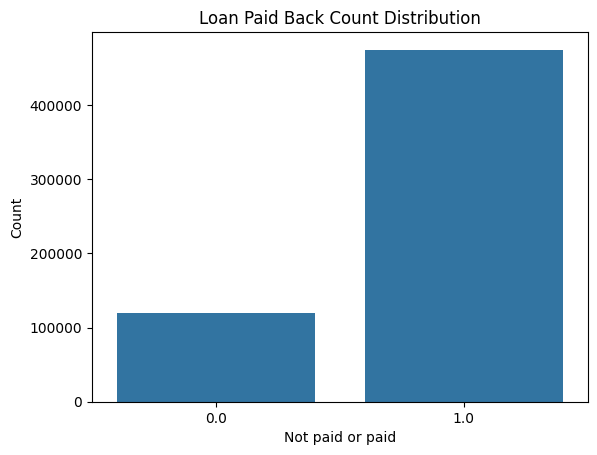

In [ ]:
#target overview
plt.title('Loan Paid Back Count Distribution')
plt.xlabel('Not paid or paid')
plt.ylabel('Count')
sns.countplot(x='loan_paid_back',
             data=train_df)
plt.show()

In [ ]:
successfully_paid = (train_df['loan_paid_back'] == 1).mean() * 100
print(f'A precentage of {successfully_paid}% customers have successfully paid their loan')

A precentage of 79.88195166954549% customers have successfully paid their loan


#### Numerical Variables analysis

In [ ]:
# Analyze numerical features
numerical_features = train_df.select_dtypes(include=['int64','float64'])
numerical_features


,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back
0,29367.99,0.084,736,2528.42,13.67,1.0
1,22108.02,0.166,636,4593.10,12.92,0.0
2,49566.20,0.097,694,17005.15,9.76,1.0
3,46858.25,0.065,533,4682.48,16.10,1.0
4,25496.70,0.053,665,12184.43,10.21,1.0
...,...,...,...,...,...,...
593989,23004.26,0.152,703,20958.37,10.92,1.0
593990,35289.43,0.105,559,3257.24,14.62,1.0
593991,47112.64,0.072,675,929.27,14.13,1.0
593992,76748.44,0.067,740,16290.40,9.87,1.0


In [ ]:
numerical_features.describe()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back
count,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000
mean,48212.202976,0.120696,680.916009,15020.297629,12.356345,0.798820
std,26711.942078,0.068573,55.424956,6926.530568,2.008959,0.400883
min,6002.430000,0.011000,395.000000,500.090000,3.200000,0.000000
25%,27934.400000,0.072000,646.000000,10279.620000,10.990000,1.000000
50%,46557.680000,0.096000,682.000000,15000.220000,12.370000,1.000000
75%,60981.320000,0.156000,719.000000,18858.580000,13.680000,1.000000
max,393381.740000,0.627000,849.000000,48959.950000,20.990000,1.000000


<Figure size 1200x800 with 0 Axes>

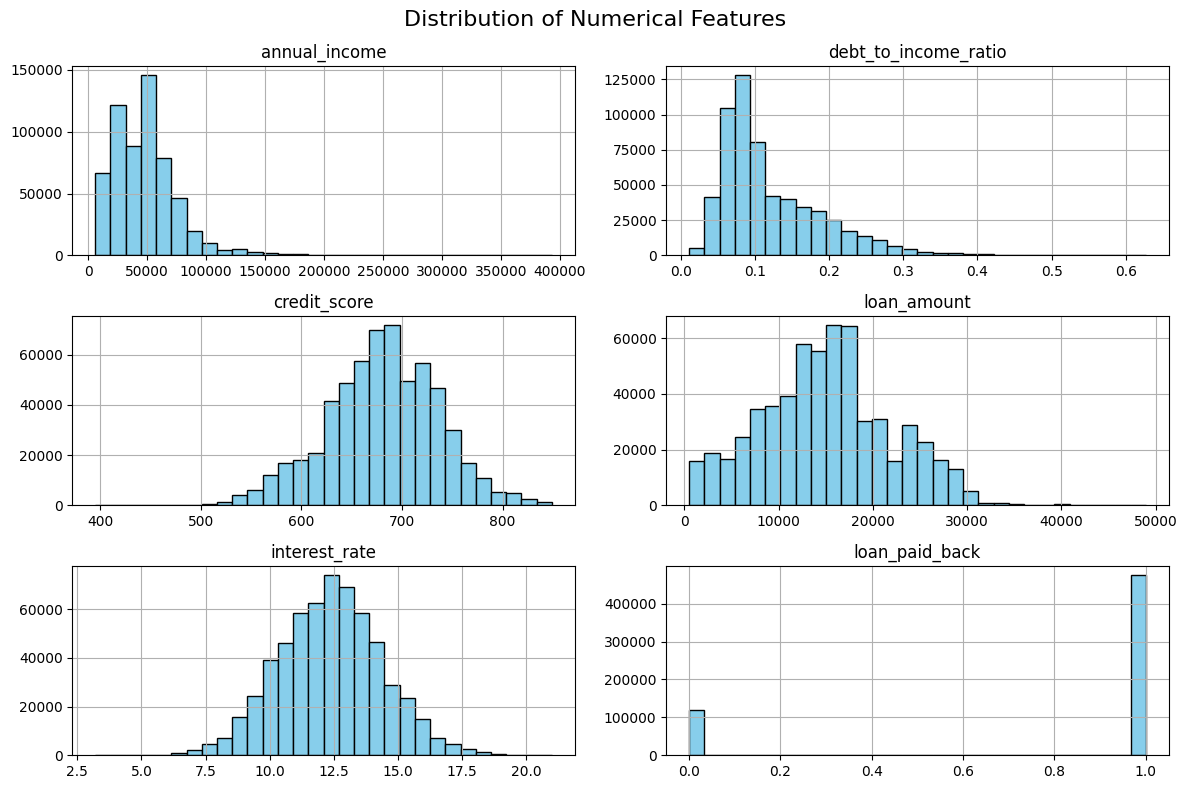

In [ ]:
# feature distribution analysis
plt.figure(figsize=(12, 8))
numerical_features.hist(bins=30, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

<Axes: xlabel='annual_income', ylabel='loan_amount'>

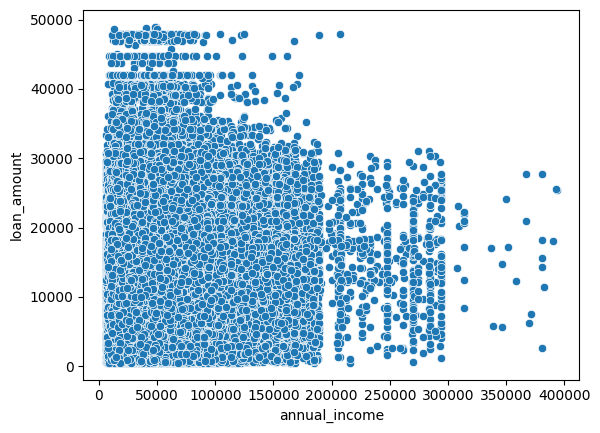

In [ ]:
# loan_amount vs annual income
sns.scatterplot(
    x='annual_income',
    y= 'loan_amount',
    data= train_df
)

In [ ]:
percentage = (train_df['annual_income'] < 200000).mean() * 100
print(f"{percentage:.2f}% of borrowers have annual income less 200K")


99.89% of borrowers have annual income less 200K


<Axes: xlabel='loan_paid_back', ylabel='annual_income'>

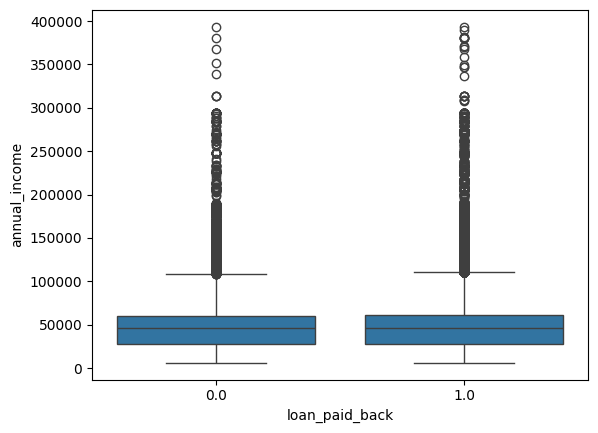

In [ ]:
# loan_paid_back vs annual_income
sns.boxplot(x='loan_paid_back', y='annual_income' , data=train_df)

<Axes: xlabel='loan_paid_back', ylabel='debt_to_income_ratio'>

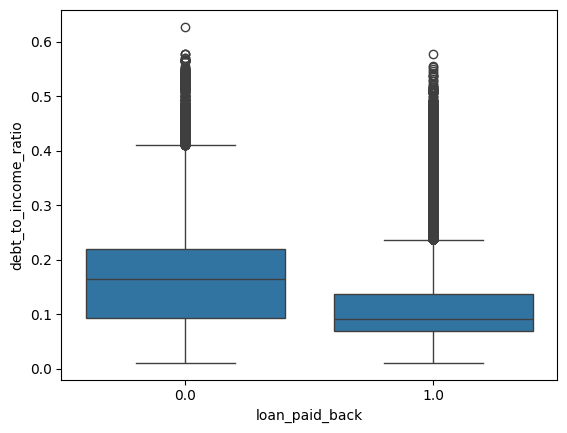

In [ ]:
# loan_paid_back vs debt_to_income_ratio
sns.boxplot(x='loan_paid_back', y='debt_to_income_ratio' , data=train_df)

<Axes: xlabel='loan_paid_back', ylabel='credit_score'>

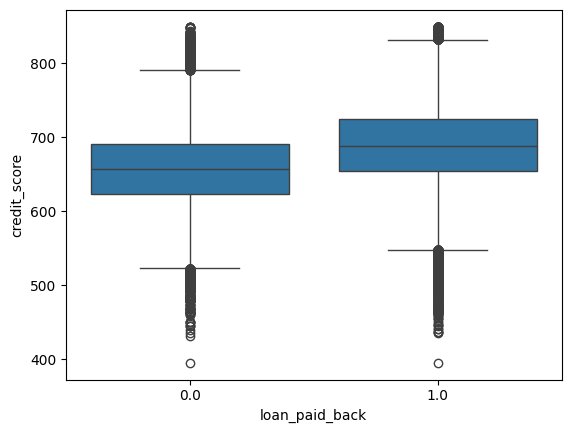

In [ ]:
# loan_paid_back vs credit_score
sns.boxplot(x='loan_paid_back', y='credit_score' , data=train_df)

<Axes: xlabel='loan_paid_back', ylabel='interest_rate'>

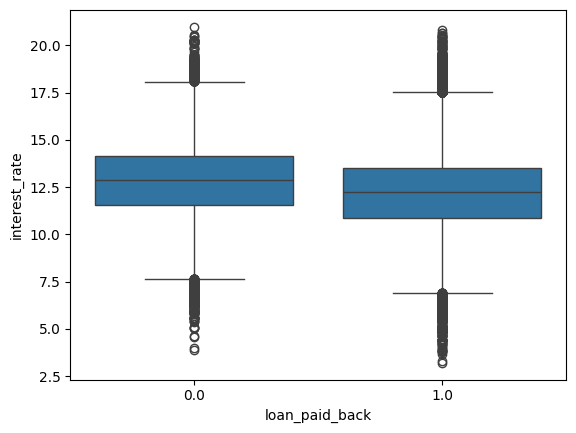

In [ ]:
# loan_paid_back vs interest_rate
sns.boxplot(x='loan_paid_back', y='interest_rate' , data=train_df)

#### Categorical variable analysis

<Axes: xlabel='loan_paid_back', ylabel='count'>

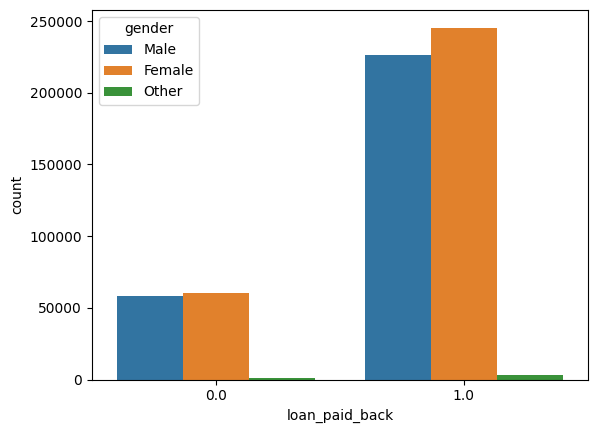

In [ ]:
# loan payback by gender
sns.countplot(
    x='loan_paid_back',
    hue='gender',
    data= train_df
)

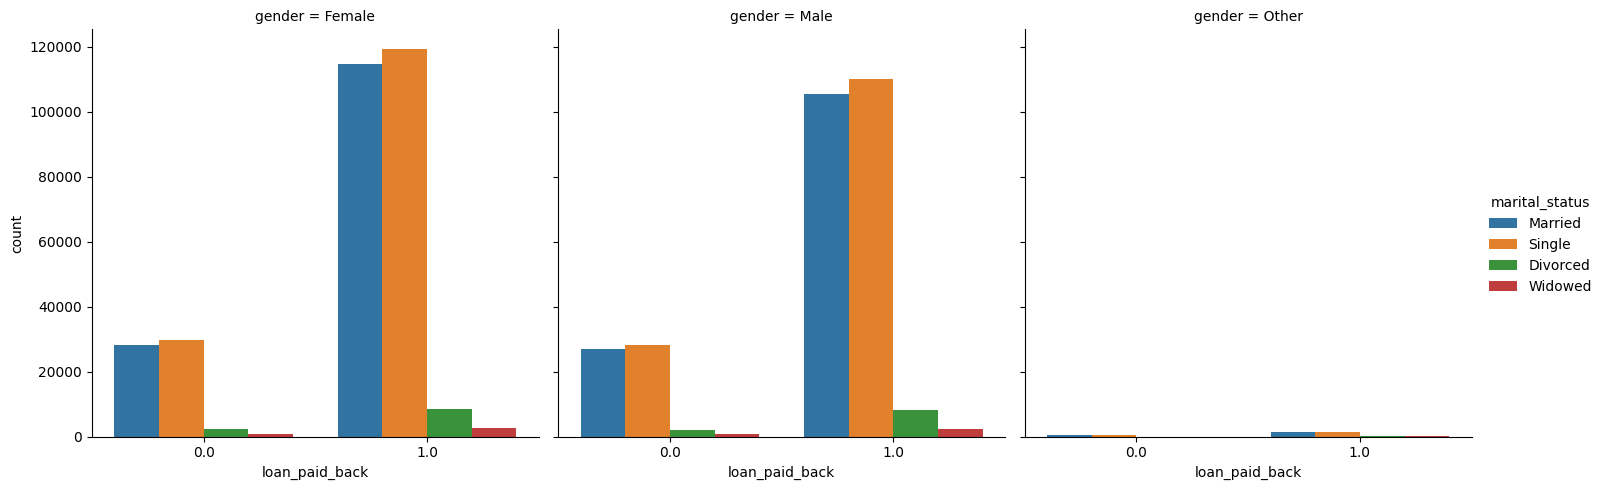

In [ ]:
# loan payback by gender and marital_status
sns.catplot(
    x='loan_paid_back',
    hue='marital_status',
    data= train_df,
    col='gender',
    kind='count'
)

<Axes: xlabel='grade', ylabel='count'>

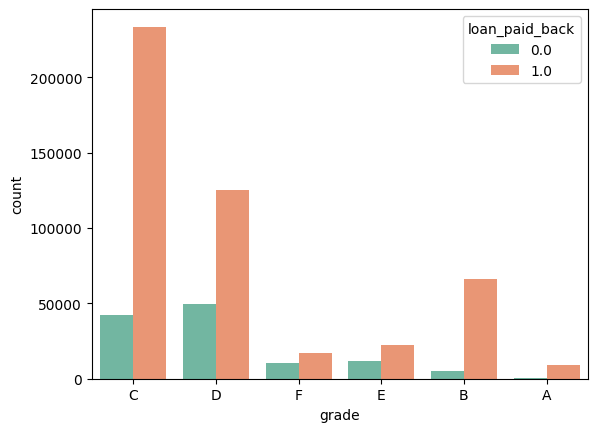

In [ ]:
# Extract the first letter
train_df['grade'] = train_df['grade_subgrade'].str[0]
final_test_df['grade'] = final_test_df['grade_subgrade'].str[0]
# Now plot using the new column
sns.countplot(
    hue='loan_paid_back',
    x='grade',
    data=train_df,
    palette='Set2'
)


<Axes: xlabel='loan_purpose', ylabel='count'>

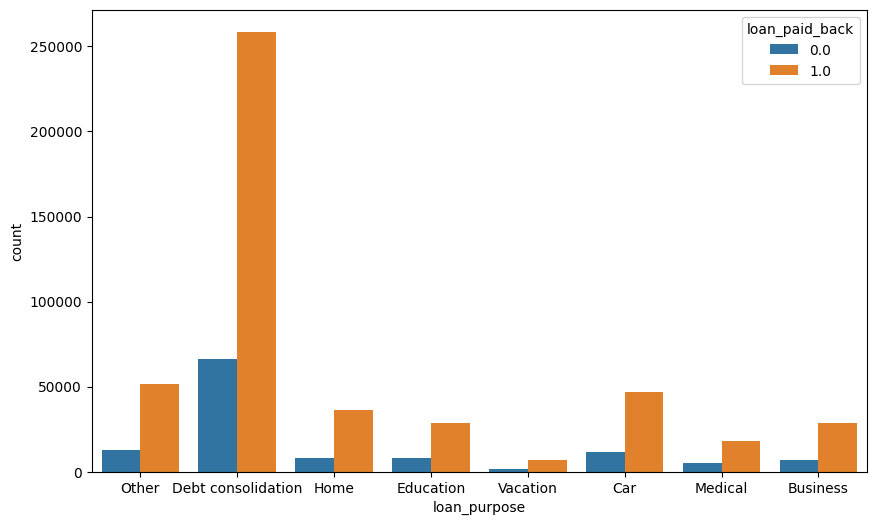

In [ ]:
# loan paid back vs purpose
plt.figure(figsize=(10,6))
sns.countplot(
    x='loan_purpose',
    hue='loan_paid_back',
    data=train_df
)

In [ ]:
# Probability of loan paid back per loan purpose
loan_purpose_probs = train_df.groupby('loan_purpose')['loan_paid_back'].mean().sort_values(ascending=False)

print(loan_purpose_probs)


loan_purpose
Home                  0.823224
Business              0.813104
Other                 0.802377
Car                   0.800630
Debt consolidation    0.796911
Vacation              0.796071
Medical               0.778085
Education             0.777053
Name: loan_paid_back, dtype: float64


<Axes: xlabel='employment_status', ylabel='count'>

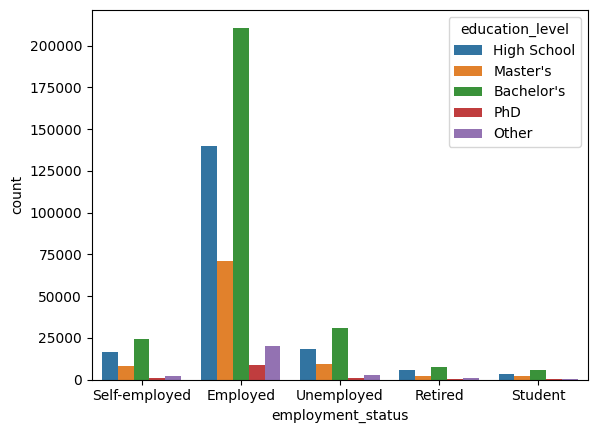

In [ ]:
# people's education level and employment status analysis
sns.countplot(
    x='employment_status',
    hue='education_level',
    data=train_df
)

<Axes: xlabel='employment_status', ylabel='count'>

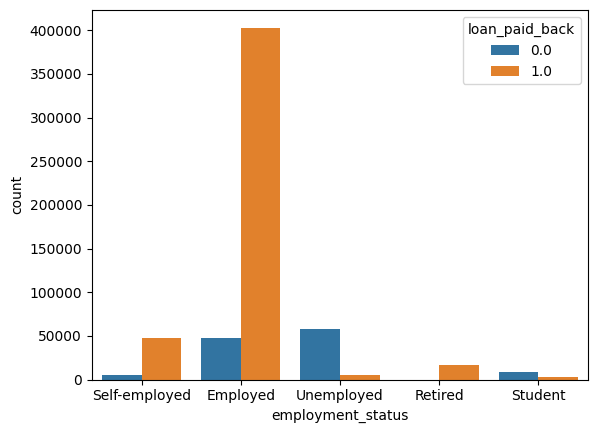

In [ ]:
# loan paid back vs education_level
sns.countplot(
    x='employment_status',
    hue='loan_paid_back',
    data=train_df
)

#### Correlation

<Axes: >

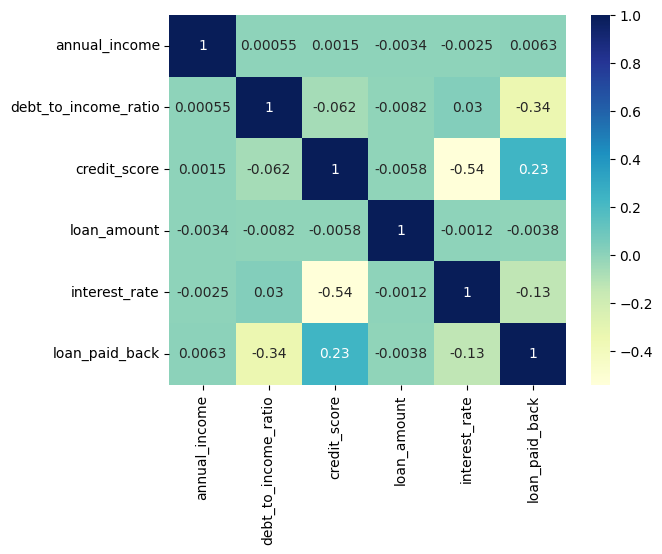

In [ ]:
# sns hatmap for correlations
sns.heatmap(
    numerical_features.corr(),
    annot=True,
    cmap='YlGnBu'
)

### 📄 EDA Summary

#### 🧾 **About the Data**

The dataset contains **593,994 loan records** with **13 features**, covering demographic, financial, and loan-related information.  
The target variable, **`loan_paid_back`**, indicates whether a borrower successfully repaid the loan.

- **Numerical Features:** `annual_income`, `debt_to_income_ratio`, `credit_score`, `loan_amount`, `interest_rate`, `loan_paid_back`  
- **Categorical Features:** `gender`, `marital_status`, `education_level`, `employment_status`, `loan_purpose`, `grade_subgrade`  

No missing values were found, and all numerical variables are in the correct format. However, **outliers** were observed in `annual_income` and `loan_amount`.

---

## 🔍 **Key Findings**

### **Numerical Features**
- `annual_income` and `loan_amount` are **right-skewed**, indicating that most borrowers earn relatively less, while a few earn very high amounts.  
- `interest_rate` and `credit_score` appear to be **uniformly distributed**.  
- Only about **0.2%** of borrowers have an annual income exceeding **200K**.  

### **Categorical Features**
- The **most common loan purpose** is **loan consolidation**.  
- Most borrowers are **employed full-time** and hold at least a **bachelor’s degree**.  
- **C and D grade loans** show a **higher probability of default** compared to other grades.  
- **Females** tend to take out loans slightly more often than males, though the difference is not significant.  

### **Target Variable**
- About **79.88%** of borrowers have **successfully repaid** their loans.  
- Variables such as `debt_to_income_ratio`, `credit_score`, and `interest_rate` show noticeable impact on repayment outcomes.  
- **Unemployed individuals** and **students** are more likely to **default** on their loans.  

### **Correlations**
- `credit_score` is **negatively correlated** with `interest_rate` — higher scores lead to lower interest rates.  
- `credit_score` also shows a **weak positive correlation** with loan repayment success.  

---

## 💡 **Insights and Implications**

Borrowers with **high income**, **stable employment**, **strong credit scores**, and **low debt-to-income ratios** have a significantly higher chance of repaying their loans.  
Employment status, credit score, and debt-related ratios appear to be **key predictors** of loan repayment behavior.  

These insights can guide the development of **credit risk models**, helping lenders identify **low-risk borrowers** and reduce potential defaults.


## ⚙️  Pre-Processing

In [ ]:
numerical_features_names =list( numerical_features.columns)
numerical_features_names.remove('loan_paid_back')

In [ ]:
train_df.head()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back,grade
0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0,C
1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0,D
2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0,C
3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0,F
4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0,D


In [ ]:
#standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_df[numerical_features_names] = scaler.fit_transform(train_df[numerical_features_names])
final_test_df[numerical_features_names] = scaler.transform(final_test_df[numerical_features_names])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Binary encode gender
train_df['gender'] = train_df['gender'].map({'Male': 0, 'Female': 1})
final_test_df['gender'] = final_test_df['gender'].map({'Male': 0, 'Female': 1})

# Separate target from features
X_train = train_df.drop(columns=['loan_paid_back'])
y_train = train_df['loan_paid_back']
X_test = final_test_df.copy()

# Define categorical columns to one-hot encode
label_cols = ['loan_purpose', 'education_level', 'employment_status',
              'marital_status', 'grade_subgrade', 'grade','gender']

# Create ColumnTransformer
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(handle_unknown='ignore'), label_cols)],
    remainder='passthrough'
)

# Fit and transform
train_encoded = ct.fit_transform(X_train)
final_test_encoded = ct.transform(X_test)

# Convert back to DataFrame
train_encoded = pd.DataFrame(train_encoded.toarray(), columns=ct.get_feature_names_out())
final_test_encoded = pd.DataFrame(final_test_encoded.toarray(), columns=ct.get_feature_names_out())

# Add back the target column to training data
train_encoded['loan_paid_back'] = y_train.values

print(train_encoded.shape, final_test_encoded.shape)


(593994, 67) (254569, 66)


In [ ]:
train_encoded.head()

,encoder__loan_purpose_Business,encoder__loan_purpose_Car,encoder__loan_purpose_Debt consolidation,encoder__loan_purpose_Education,encoder__loan_purpose_Home,encoder__loan_purpose_Medical,encoder__loan_purpose_Other,encoder__loan_purpose_Vacation,encoder__education_level_Bachelor's,encoder__education_level_High School,...,encoder__grade_F,encoder__gender_0.0,encoder__gender_1.0,encoder__gender_nan,remainder__annual_income,remainder__debt_to_income_ratio,remainder__credit_score,remainder__loan_amount,remainder__interest_rate,loan_paid_back
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,-0.705461,-0.535135,0.993849,-1.803484,0.653899,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-0.977248,0.660668,-0.810394,-1.505401,0.280571,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.050689,-0.345556,0.236067,0.286558,-1.292385,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,-0.050687,-0.812211,-2.668764,-1.492497,1.863482,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,-0.850388,-0.987206,-0.287163,-0.409421,-1.068388,1.0


## ✨ Models

In [ ]:
y = train_encoded['loan_paid_back']
X = train_encoded.drop(columns='loan_paid_back')

In [ ]:
X.isnull().sum().sort_values(ascending=False).head(10)

,0
encoder__loan_purpose_Business,0
encoder__loan_purpose_Car,0
encoder__loan_purpose_Debt consolidation,0
encoder__loan_purpose_Education,0
encoder__loan_purpose_Home,0
encoder__loan_purpose_Medical,0
encoder__loan_purpose_Other,0
encoder__loan_purpose_Vacation,0
encoder__education_level_Bachelor's,0
encoder__education_level_High School,0


### 📈 Logistic regression

In [ ]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.linear_model import LogisticRegression

kf = KFold(n_splits=10, shuffle=True, random_state=42)
model = LogisticRegression(max_iter=1000)

scores = cross_validate(
    estimator=model,
    X=X,
    y=y,
    cv=kf,
    scoring=['accuracy', 'f1', 'roc_auc']
)

print("Mean Accuracy:", scores['test_accuracy'].mean())
print("Mean F1 Score:", scores['test_f1'].mean())
print("Mean ROC AUC:", scores['test_roc_auc'].mean())

Mean Accuracy: 0.9007734108879498
Mean F1 Score: 0.940105693773478
Mean ROC AUC: 0.9105433255888116


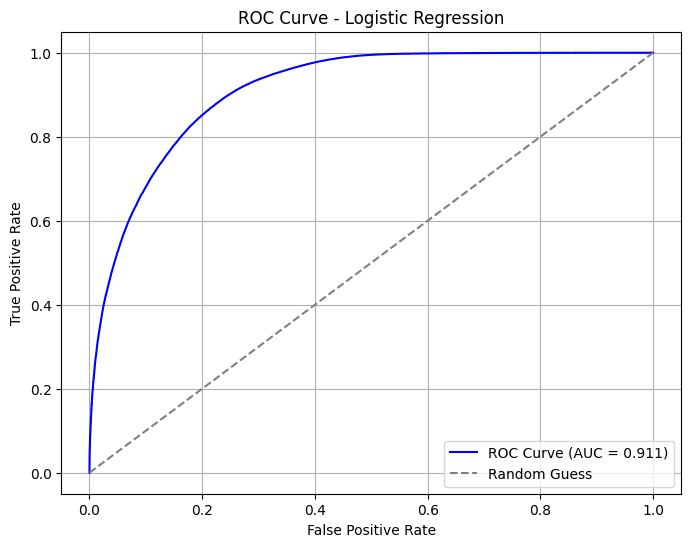

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# predict probabilities for positive class
model.fit(X,y)
y_pred_prob = model.predict_proba(X)[:, 1]

# compute ROC curve
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)

# compute AUC
roc_auc = roc_auc_score(y, y_pred_prob)

# plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--', label='Random Guess')
plt.title('ROC Curve - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y, y_pred_prob)

# choose threshold that balances both
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[f1_scores.argmax()]
print("Best threshold:", best_threshold)


Best threshold: 0.38316818285029025


In [ ]:
# logistic reg predictions
y_pred_final = (y_pred_prob >= best_threshold).astype(int)

In [ ]:
#submission1
y_final_prob = model.predict_proba(final_test_encoded)[:,1]
submission_1 =pd.DataFrame(
   { 'id' : test_id,
    'loan_paid_back' : y_final_prob}
    )
submission_1.to_csv('submission1.csv', index=False)

print(submission_1.shape)

(254569, 2)


### 🏞️ Random Forests Regression

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100],
    'max_depth': [ None],
    'min_samples_split': [5],
    'min_samples_leaf': [3],
    'max_features': ['sqrt'],
    'criterion': ['entropy']
}
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring=scoring,
    n_jobs=-1,
    verbose=2,
    refit='roc_auc',
    error_score='raise'  # stop immediately if a parameter fails
)


grid_search.fit(X, y)
print("Best params:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

print("Best ROC-AUC score:", grid_search.cv_results_['mean_test_roc_auc'][grid_search.best_index_])
print("Best F1 score:", grid_search.cv_results_['mean_test_f1'][grid_search.best_index_])
print("Best Accuracy:", grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_])

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best params: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}
Best score: 0.9107531475073196
Best ROC-AUC score: 0.9107531475073196
Best F1 score: 0.9413192652078219
Best Accuracy: 0.9020057441306439


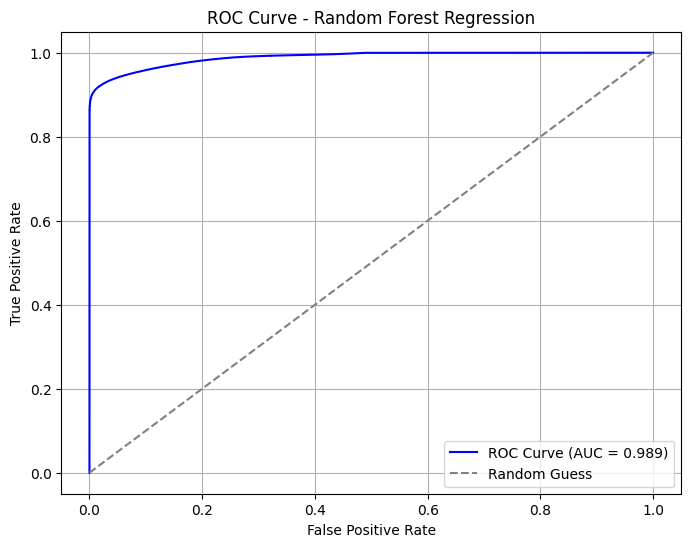

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

best_model = grid_search.best_estimator_

y_pred_prob = best_model.predict_proba(X)[:, 1]  # probabilities for positive class

# compute ROC curve
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)

# compute AUC
roc_auc = roc_auc_score(y, y_pred_prob)

# plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--', label='Random Guess')
plt.title('ROC Curve - Random Forest Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#submission2
y_final_prob = best_model.predict_proba(final_test_encoded)[:,1]
submission_2 =pd.DataFrame(
   { 'id' : test_id,
    'loan_paid_back' : y_final_prob}
    )
submission_2.to_csv('submission2.csv', index=False)

print(submission_2.shape)

(254569, 2)


### 🔋 XGBoost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import xgboost as xgb

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBClassifier(
    n_estimators=200,       # number of trees
    learning_rate=0.1,      # step size
    max_depth=6,            # typical range: 3–10
    subsample=0.8,          # use 80% of data per tree (helps generalization)
    colsample_bytree=0.8,   # use 80% of features per tree
    random_state=42,
    eval_metric='logloss',  # avoids warnings
    use_label_encoder=False
)

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print(f"XGBoost Accuracy: {acc:.4f}")
print(f"XGBoost F1 Score: {f1:.4f}")
print(f"XGBoost AUC: {auc:.4f}")


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:12:37] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9045
XGBoost F1 Score: 0.9425
XGBoost AUC: 0.9210


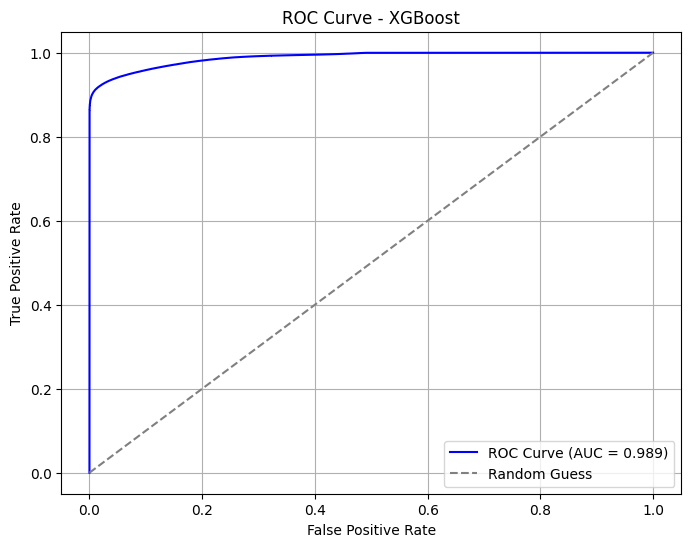

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

best_model = grid_search.best_estimator_

# compute ROC curve
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)

# compute AUC
roc_auc = roc_auc_score(y, y_pred_prob)

# plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--', label='Random Guess')
plt.title('ROC Curve - XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# submission 4
y_final_prob = model.predict_proba(final_test_encoded)[:, 1]
submission_4 =pd.DataFrame(
   { 'id' : test_id,
    'loan_paid_back' : y_final_prob}
    )
submission_4.to_csv('submission4.csv', index=False)

### ⚡ Lightgbm

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import lightgbm as lgb

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create model
model = lgb.LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=-1,
    random_state=42
)

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print(f"LightGBM Accuracy: {acc:.4f}")
print(f"LightGBM F1 Score: {f1:.4f}")
print(f"LightGBM AUC: {auc:.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 379692, number of negative: 95503
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044917 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1397
[LightGBM] [Info] Number of data points in the train set: 475195, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.799024 -> initscore=1.380203
[LightGBM] [Info] Start training from score 1.380203
LightGBM Accuracy: 0.9041
LightGBM F1 Score: 0.9423
LightGBM AUC: 0.9207


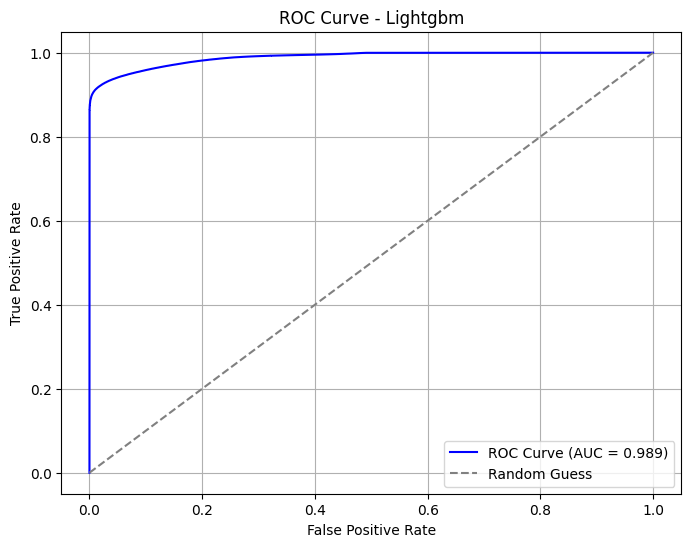

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

best_model = grid_search.best_estimator_

# compute ROC curve
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)

# compute AUC
roc_auc = roc_auc_score(y, y_pred_prob)

# plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--', label='Random Guess')
plt.title('ROC Curve - Lightgbm')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# submission 3
y_final_prob = model.predict_proba(final_test_encoded)[:, 1]
submission_3 =pd.DataFrame(
   { 'id' : test_id,
    'loan_paid_back' : y_final_prob}
    )
submission_3.to_csv('submission3.csv', index=False)

### 😾 Catboost

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.5 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Split your data first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create model
model = CatBoostClassifier(
    iterations=200,         # similar to n_estimators
    learning_rate=0.1,      # step size
    depth=6,                # typical range: 4–10
    random_seed=42,
    eval_metric='AUC',
    verbose=0               # hides training logs
)

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print(f"CatBoost Accuracy: {acc:.4f}")
print(f"CatBoost F1 Score: {f1:.4f}")
print(f"CatBoost AUC: {auc:.4f}")

CatBoost Accuracy: 0.9051
CatBoost F1 Score: 0.9429
CatBoost AUC: 0.9196


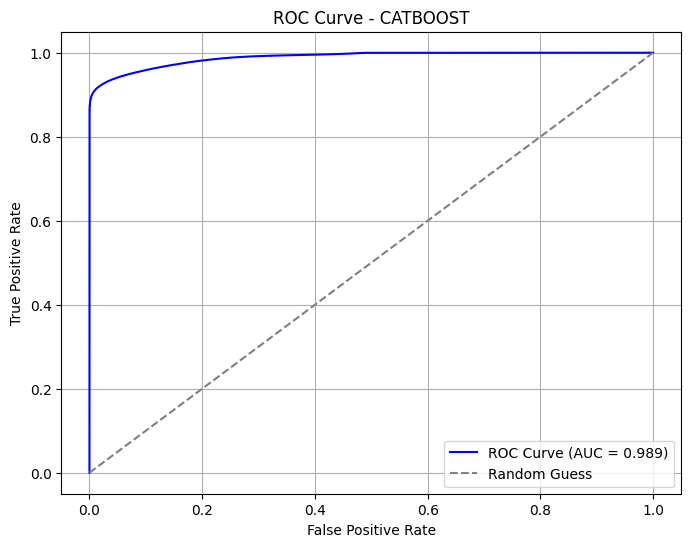

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

best_model = grid_search.best_estimator_

# compute ROC curve
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)

# compute AUC
roc_auc = roc_auc_score(y, y_pred_prob)

# plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--', label='Random Guess')
plt.title('ROC Curve - CATBOOST')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# submission 5
y_final_prob = model.predict_proba(final_test_encoded)[:, 1]
submission_5 =pd.DataFrame(
   { 'id' : test_id,
    'loan_paid_back' : y_final_prob}
    )
submission_5.to_csv('submission5.csv', index=False)